This notebook allows quick visualization and exploration of the GameInformer Review data. It also acts as a quick primer on how to visualize data with Pandas and Seaborn.

Let's start off by making all the necessary imports.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import csv

Now we need to load in the data. We also need to get dummy representations of any non-numeric values.

In [2]:
GI_data = pd.read_csv('GIreviewcomplete3.csv', encoding = "ISO-8859-1")
GI_data2 = pd.get_dummies(GI_data)

We can get a violin plot for every reviewer. The width of the violins shows how often a particular score was assigned, while the height and length of a violin show the possible range of scores.

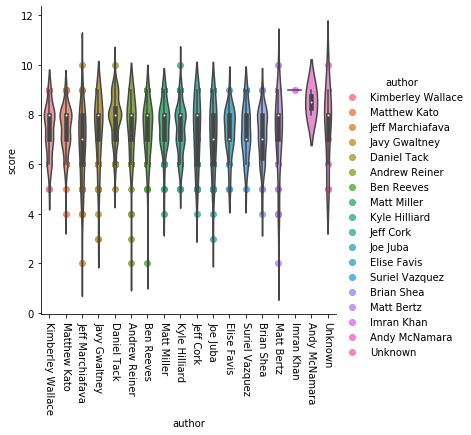

In [3]:
#---display violin plot for author and avg score

sns.lmplot(x='author', y='score', data=GI_data, hue='author', fit_reg=False)
sns.violinplot(x='author',y='score', data=GI_data)
plt.xticks(rotation=-90)
plt.show()

It's possible to filter the database by multiple criteira. For instance, we could return every review over a certain score by a certain reviewer.

In [4]:
EF_reviews = GI_data[(GI_data.author == 'Elise Favis') & (GI_data.score >= 8.0)]
print(EF_reviews)

                                                title  score       author  \
48                                     Heaven's Vault      8  Elise Favis   
58                                        Photographs      8  Elise Favis   
102                                  Bury Me, My Love      8  Elise Favis   
158              Life Is Strange 2: Episode 1 ? Roads      8  Elise Favis   
243                                             Minit      8  Elise Favis   
262                  Where The Water Tastes Like Wine      9  Elise Favis   
266                                          Florence      8  Elise Favis   
276                                        Subnautica      8  Elise Favis   
286                              The Red Strings Club      8  Elise Favis   
405                                            Tacoma      8  Elise Favis   
442                                        Perception      8  Elise Favis   
485                                  Thimbleweed Park      8  Elise Favis   

Countplots and barplots are useful ways of visualizing data. Countplots just plot the count of your chosen variable, whereas bar plots compare two chosen variables with each other.

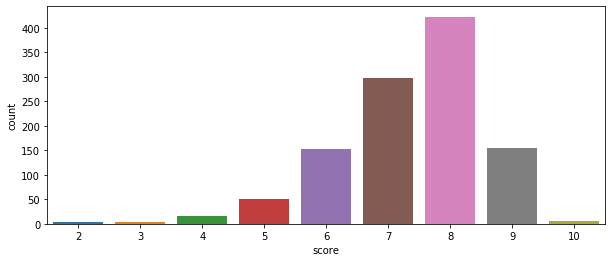

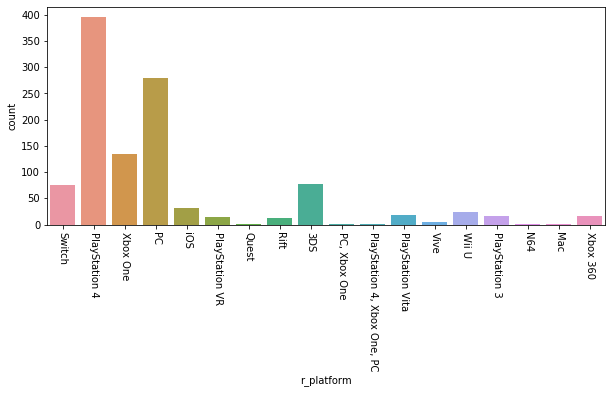

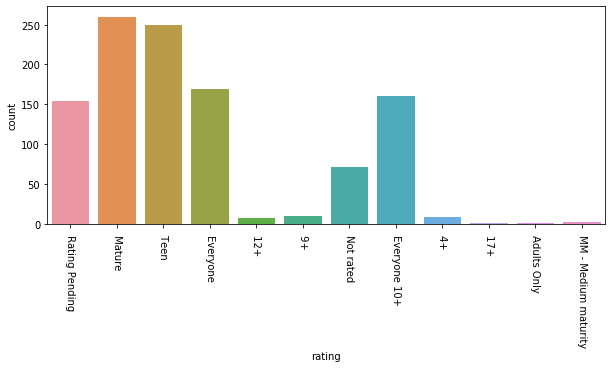

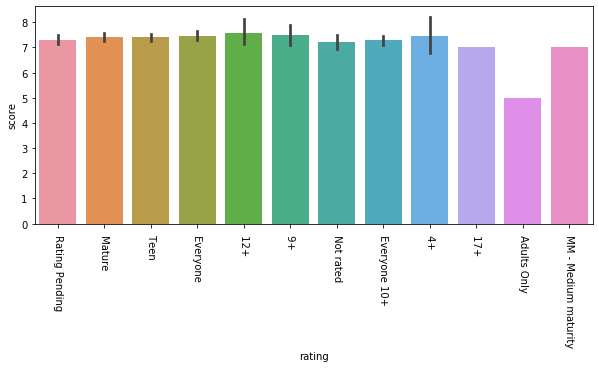

In [5]:
plt.figure(figsize=(10, 4))
scores = sns.countplot(x='score', data=GI_data2)
plt.xticks()
plt.show(scores)

plt.figure(figsize=(10, 4))
r_platform = sns.countplot(x="r_platform", data=GI_data)
plt.xticks(rotation=-90)
plt.show(r_platform)

plt.figure(figsize=(10, 4))
rating = sns.countplot(x="rating", data=GI_data)
plt.xticks(rotation=-90)
plt.show(rating)

plt.figure(figsize=(10, 4))
plt.xticks(rotation=-90)
barplot_score = sns.barplot(x="rating", y="score", data=GI_data)
plt.show(barplot_score)

Seaborn also contains a handy distribution function, and in this case we can see the relative distribution of GameInformer review scores. Most of their assigned scores have been an 8.

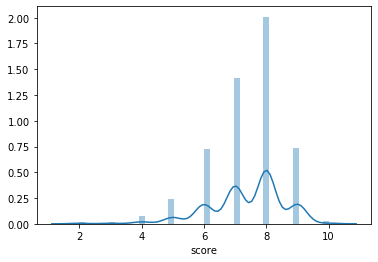

In [6]:
sns.distplot(GI_data2['score'])
plt.show()

Swarmplots show the individual instances of Y given X, or in this case of a certain score given a certain rating.

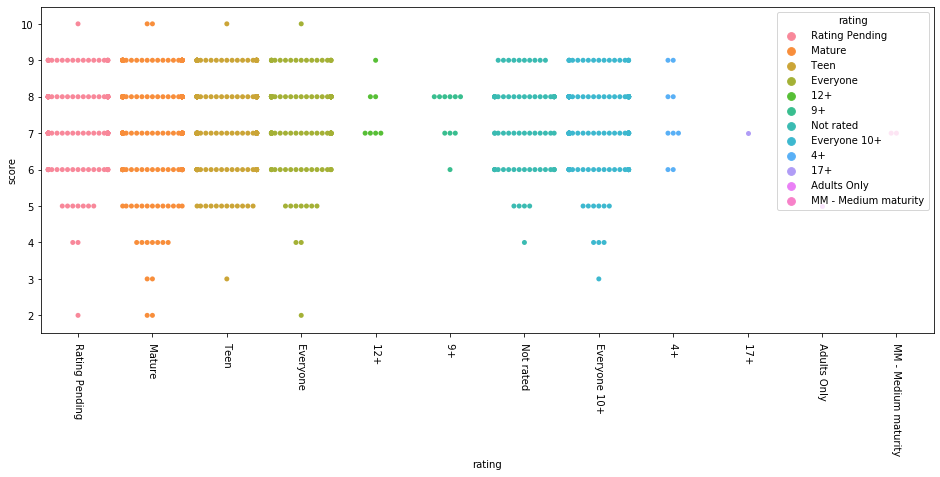

In [7]:
plt.figure(figsize=(16, 6))
factorplot_score = sns.swarmplot(x="rating", y="score", data=GI_data, hue='rating')
plt.xticks(rotation= -90)
plt.show(factorplot_score)

Let's do some analysis of publisher and developer statistics. We'd want to start by getting a list of publishers and developers. Let's just get the 100 most common.

In [15]:
publishers = Counter(GI_data['publisher'])
developers = Counter(GI_data['developer'])

pub_list = []
dev_list = []

for item, freq in publishers.most_common(100):
    pub_list.append(item)

for item, freq in developers.most_common(100):
    dev_list.append(item)
    
print(pub_list[:10])
print("--------------")
print(dev_list[:10])


[' Nintendo', ' Telltale Games', ' Square Enix', ' Ubisoft', ' Sony Computer Entertainment', ' Devolver Digital', ' Warner Bros. Interactive', ' Microsoft Game Studios', ' Electronic Arts', ' Bandai Namco']
--------------
[' Telltale Games', ' Nintendo', ' Capcom', ' Square Enix', ' EA Tiburon', ' Atlus', ' Visual Concepts', ' EA Canada', ' Dontnod Entertainment', ' Ubisoft Montreal']


If we make a publisher and developer dataframe, we can transform those dataframes by getting the mean and median values of their scores. We can then merge those back into the original dataframe to get a dataframe sorted by publisher which also has the publisher's mean and median scores. We could do the same thing for developers.

In [9]:
pub_df = pd.DataFrame(index=None)
dev_df = pd.DataFrame(index=None)

# append rows for individual publishers to dataframe

def custom_mean(group):
    group['mean'] = group['score'].mean()
    return group

def custom_median(group):
    group['median'] = group['score'].median()
    return group

for pub in pub_list:
    scores = pd.DataFrame(GI_data[(GI_data.publisher == pub) & (GI_data.score)], index=None)
    pub_df = pub_df.append(scores, ignore_index=True)

pub_mean_df = pub_df.groupby('publisher').apply(custom_mean)
pub_median_df = pub_df.groupby('publisher').apply(custom_median)
pub_median = pub_median_df['median']
pub_merged_df = pub_mean_df.join(pub_median)
print(pub_merged_df.head(3))
pub_merged_df.to_csv('pub_merged.csv')

for dev in dev_list:
    scores = pd.DataFrame(GI_data[(GI_data.developer == dev) & (GI_data.score)], index=None)
    dev_df = dev_df.append(scores, ignore_index=True)

dev_mean_df = dev_df.groupby('developer').apply(custom_mean)
dev_median_df = dev_df.groupby('developer').apply(custom_median)
dev_median = dev_median_df['median']
dev_merged_df = dev_mean_df.join(dev_median)
dev_merged_df.to_csv('dev_merged.csv')
print(dev_merged_df.head(3))


                                               title  score  \
0                          Fire Emblem: Three Houses      9   
1        Marvel Ultimate Alliance 3: The Black Order      7   
2  Cadence of Hyrule ? Crypt of the Necrodancer F...      7   

              author r_platform o_platform  publisher              developer  \
0  Kimberley Wallace     Switch        NaN   Nintendo    Intelligent Systems   
1      Andrew Reiner     Switch        NaN   Nintendo             Team Ninja   
2     Suriel Vazquez     Switch        NaN   Nintendo   Brace Yourself Games   

     release_date           rating     mean  median  
0   July 26, 2019              NaN  7.73913     7.0  
1   July 19, 2019             Teen  7.73913     7.0  
2   June 13, 2019   Rating Pending  7.73913     7.0  
                                              title  score             author  \
0                The Walking Dead: The Final Season      7  Kimberley Wallace   
1    The Walking Dead: The Final Season ? Episod

Let's select just the top publishers and see what their mean and median scores are.

In [17]:
dev_data = pd.read_csv('dev_merged.csv')
dev_data = dev_data.drop(dev_data.columns[0], axis=1)
developer_names = list(dev_data['developer'].unique())
#print(developer_names)

dev_examples = pd.DataFrame(index=None)

for dev in developer_names:
   dev_examples = dev_examples.append(dev_data[dev_data.developer == dev].iloc[0])

#print(dev_examples.to_string())

dev_stats = dev_examples[['developer', 'mean', 'median']]
print(dev_stats.head(20))

                    developer      mean  median
0              Telltale Games  7.160000     7.0
25                   Nintendo  7.714286     7.0
39                     Capcom  7.857143     9.0
46                Square Enix  8.111111     9.0
55                 EA Tiburon  6.666667     7.0
61                      Atlus  7.666667     7.0
67            Visual Concepts  7.666667     7.0
76                  EA Canada  7.000000     7.0
80      Dontnod Entertainment  7.000000     7.0
83           Ubisoft Montreal  7.000000     7.0
87              Firaxis Games  8.428571     9.0
94                   TT Games  7.666667     7.0
97     Blizzard Entertainment  9.000000     9.0
104             From Software  8.714286     9.0
111                Game Freak  7.000000     7.0
113   Double Fine Productions  7.666667     7.0
116       Intelligent Systems  8.200000     9.0
121                      SEGA  8.600000     9.0
126            HAL Laboratory  7.000000     7.0
127            Spike Chunsoft  6.000000 

Another interesting thing we could to is get hte worst reviewed games, games that have received less than a 4.

In [18]:
# how you can filter for just one criteria and then pull out only the columns you care about
# print(GI_data[GI_data.score <= 4].title)
# this is actually the preferred method...
print(GI_data.loc[GI_data.score <= 4, 'title'])


69               R.B.I. Baseball 19
124     Overkill's The Walking Dead
134                   The Quiet Man
217               Tennis World Tour
220                           Agony
259               Fear Effect Sedna
301                  Hello Neighbor
343              Raid: World War II
483              R.B.I. Baseball 17
488                 Old Time Hockey
489                 Old Time Hockey
503                      1-2-Switch
589                    One Way Trip
612             Ghostbusters (2016)
637       Homefront: The Revolution
722                   Devil's Third
767                        Armikrog
815                        Godzilla
820     Payday 2: Crimewave Edition
933              Escape Dead Island
935       Sonic Boom: Rise of Lyric
1045          Rambo: The Video Game
1063                         Rekoil
Name: title, dtype: object


We could also get only published by Nintendo by filtering out results where 'Nintendo' doesn't appear in 'publisher' with `isin`.

In [12]:
# can use "isin" in a series...
# spaces are in this, be sure to include them

r = GI_data[GI_data['publisher'].isin([' Nintendo'])][:40]
print(r)

                                                 title  score  \
0                            Fire Emblem: Three Houses      9   
5          Marvel Ultimate Alliance 3: The Black Order      7   
6                                      Dr. Mario World      8   
19                                 Super Mario Maker 2      8   
23   Cadence of Hyrule ? Crypt of the Necrodancer F...      7   
43                                  BoxBoy! + BoxGirl!      8   
64                               Yoshi's Crafted World      8   
79                                           Tetris 99      8   
101  Mario & Luigi: Bowser's Inside Story + Bowser ...      8   
103                     New Super Mario Bros. U Deluxe      8   
112                         Super Smash Bros. Ultimate      9   
123                         Pokémon: Let's Go, Pikachu      8   
144               The World Ends With You: Final Remix      7   
151                                  Super Mario Party      7   
161  Xenoblade Chronicles

Finally, let's do a swamplot of scores by Nintendo associated developers. We'll take games published by Nintnedo and plot the score given some developers. 

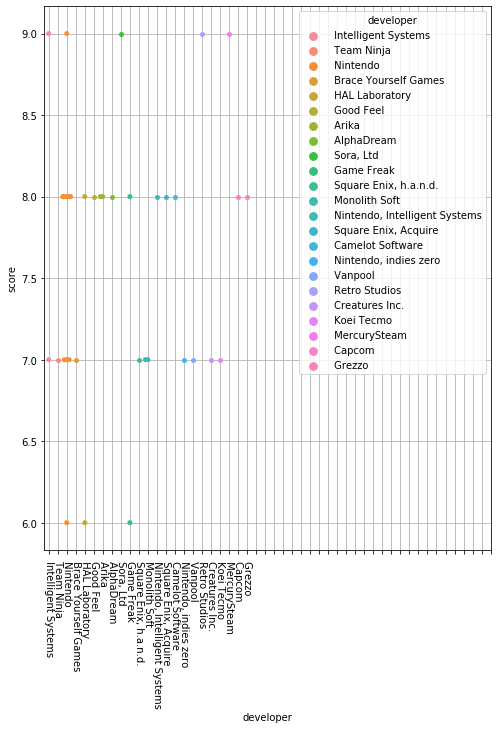

In [13]:
plt.figure(figsize=(8, 10))
dev_score = sns.swarmplot(x="developer", y="score", data=r, hue='developer')
plt.grid()
plt.xticks(range(50),rotation=-90)
plt.show(dev_score)